### Project name: California fuel economy analysis 
### Project description :


* dataset information 








key finding : 





In [1]:
#import datas 
import matplotlib.pyplot as plt
import numpy as np
from utils.colume_chk import colume_chk
from utils.read_csv import read_csv
import seaborn as sns
import pandas as pd



In [2]:
#read the csv file


fuel_data01 = read_csv('data/all_alpha_08.csv')
fuel_data02 = read_csv('data/all_alpha_18.csv')

In [3]:
# chack the data struckture
fuel_data01.shape, fuel_data02.shape

((2404, 18), (1611, 18))

#### What is the unit of measure for engine displacement? Liters
* Match the meaning for each feature.
1. Stnd : Vehicle emissions standard code
2. Cyl : Number of Cylinders in the engine
3. Trans : Transmission Type
4. Drv : Drive Axle Type

# Dataset understanding 

In [4]:
fuel_data01.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [5]:
fuel_data02.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402


### fule_data01, fule_data02 shape are ((2404, 18), (1611, 18))

In [6]:
fuel_data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

if you chackout tha info table there are some missing value in fule_data01 
 1. cyl , 
 2. trans , 
 3. drive , 
 4. city mrg , 
 5. hwy mpg , 
 6. cmb mpg , 
 7. unadj cmb mpg , 
 8. greenhouse gas score 

In [7]:
fuel_data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

if you chackout tha info table there are some missing value in fule_data01 
1. displ
2. syl


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'model'),
  Text(1, 0, 'displ'),
  Text(2, 0, 'cyl'),
  Text(3, 0, 'trans'),
  Text(4, 0, 'drive'),
  Text(5, 0, 'fuel'),
  Text(6, 0, 'cert_region'),
  Text(7, 0, 'veh_class'),
  Text(8, 0, 'air_pollution_score'),
  Text(9, 0, 'city_mpg'),
  Text(10, 0, 'hwy_mpg'),
  Text(11, 0, 'cmb_mpg'),
  Text(12, 0, 'greenhouse_gas_score'),
  Text(13, 0, 'smartway')])

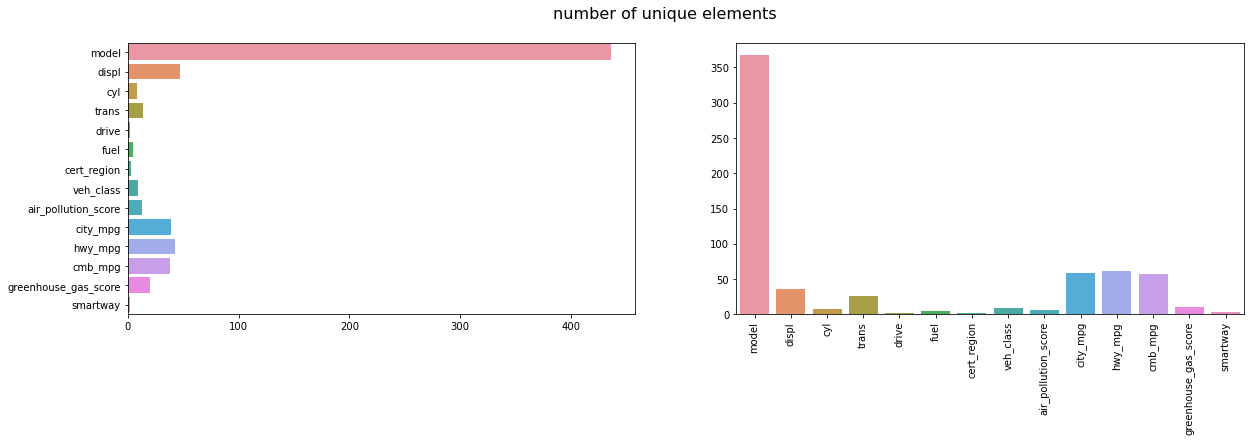

In [61]:

from matplotlib.pyplot import figure
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('number of unique elements ', fontsize=16)
plt.rcParams["figure.figsize"] = (20,5)
#add title 
sns.barplot(x=fuel_data01.nunique(), y=fuel_data01.columns, ax=axes[0])
sns.barplot(y=fuel_data02.nunique(), x=fuel_data02.columns, ax=axes[1])
plt.xticks(rotation=90)

# ax.set_xticklabels(axes.get_xticklabels(),rotation = 30)
# ax1.set_xticklabels(axes.get_xticklabels(),rotation = 30)
# fuel_data01.nunique().plot.bar(ax=axes[0], title='fuel_data 2018')
# fuel_data02.nunique().plot.bar(ax=axes[1], title='fuel_data 2008')



# data cleaning : 
1. find out any duplicate value .
2. reduce the dimensonality( remove the unimportant coloums ).
3. handel the missing values . 
4. filter the value 

1. Drop Extraneous Columns

In [9]:
# list of columns in fuel_data01
fuel_data01.columns


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [10]:

# list of columns in fuel_data02
fuel_data02.columns


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

1. 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG' ---->> those columes are no present in fuel dataset01
2. 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2' ---->> those columes are not present in fuel dataset02 


In [11]:
fuel_data01.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)


In [12]:
fuel_data02.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)


In [13]:
# check the data after droping the columns
# print(fuel_data02.columns)
# print(fuel_data01.columns)

colume_chk(fuel_data01,fuel_data02)

#add title 
# fuel_data01.nunique().plot.bar(ax=axes[0], title='fuel_data 2018')
# fuel_data02.nunique().plot.bar(ax=axes[1], title='fuel_data 2008')


       

1 Model
2 Displ
3 Cyl
4 Trans
5 Drive
6 Fuel
7 Veh Class
8 Air Pollution Score
9 City MPG
10 Hwy MPG
11 Cmb MPG
12 Greenhouse Gas Score
13 SmartWay

 number of columns in both data sets: 13


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Model'),
  Text(1, 0, 'Displ'),
  Text(2, 0, 'Cyl'),
  Text(3, 0, 'Trans'),
  Text(4, 0, 'Drive'),
  Text(5, 0, 'Fuel'),
  Text(6, 0, 'Cert Region'),
  Text(7, 0, 'Veh Class'),
  Text(8, 0, 'Air Pollution Score'),
  Text(9, 0, 'City MPG'),
  Text(10, 0, 'Hwy MPG'),
  Text(11, 0, 'Cmb MPG'),
  Text(12, 0, 'Greenhouse Gas Score'),
  Text(13, 0, 'SmartWay')])

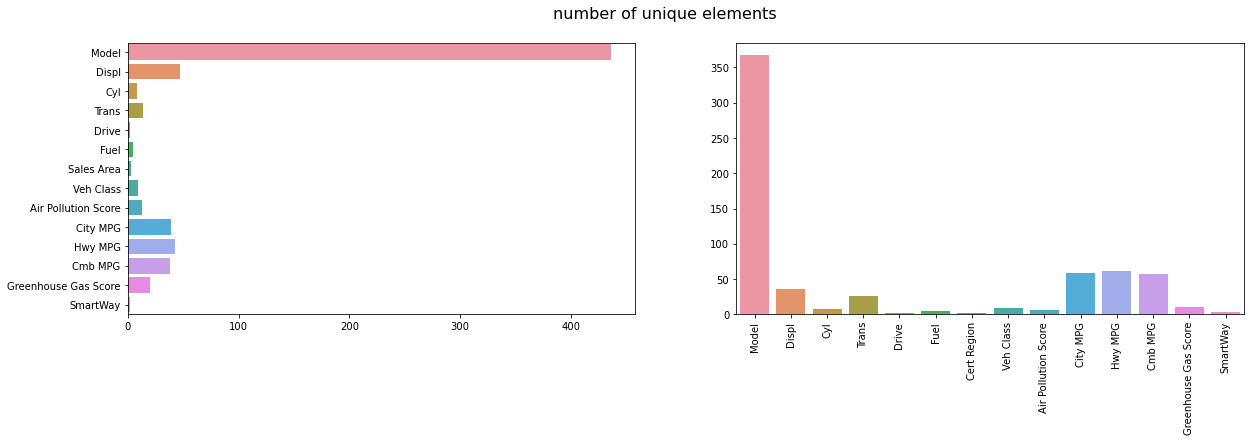

In [14]:
fig, axess = plt.subplots(nrows=1, ncols=2)
fig.suptitle('number of unique elements ', fontsize=16)
plt.rcParams["figure.figsize"] = (20,5)

#rotate the x axis labels seaborn 



sns.barplot(x=fuel_data01.nunique(), y=fuel_data01.columns, ax=axess[0])
sns.barplot(y=fuel_data02.nunique(), x=fuel_data02.columns, ax=axess[1])
plt.xticks(rotation=90)

2. Rename Columns :

Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency. Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [15]:
# rename Sales Area to Cert Region
fuel_data01.rename(columns = {"Sales Area":"Cert Region"}, inplace=True)
# confirm changes
fuel_data01.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [16]:
fuel_data01.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)
# confirm changes
fuel_data01.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
# replace spaces with underscores and lowercase labels for 2018 dataset
fuel_data02.rename(columns = lambda x: x.strip().lower().replace(" ","_"),inplace=True)
# confirm changes
fuel_data02.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [18]:
fuel_data01.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v1.csv', index=False)
fuel_data02.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v1.csv', index=False)

In [19]:
# check for uniqe values in each column for fuel_data01 and fuel_data02
x0=fuel_data01['cert_region'].unique()
y0=fuel_data01['cert_region'].value_counts()

c=fuel_data02['cert_region'].unique()
d=fuel_data02['cert_region'].value_counts()

print(f'nuber of unique element in fuel data02 :{x0}\n number of unique in fuel data02: \n{y0}')
print(f'nuber of unique element in fuel data02 :{c}\n number of unique in fuel data02:\n{d}')

nuber of unique element in fuel data02 :['CA' 'FA' 'FC']
 number of unique in fuel data02: 
FA    1157
CA    1084
FC     163
Name: cert_region, dtype: int64
nuber of unique element in fuel data02 :['FA' 'CA']
 number of unique in fuel data02:
FA    813
CA    798
Name: cert_region, dtype: int64


([<matplotlib.patches.Wedge at 0x225130418b0>,
 [Text(-0.016087611712099298, 1.0998823522310925, 'FA'),
  Text(0.01608761171209892, -1.0998823522310925, 'CA')])

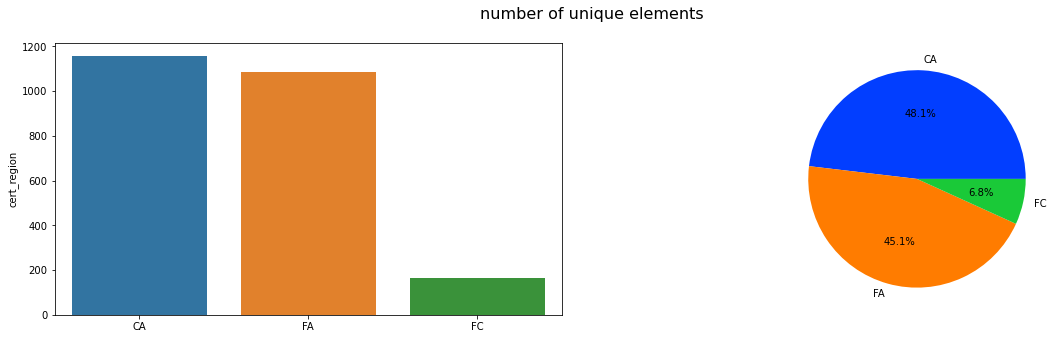

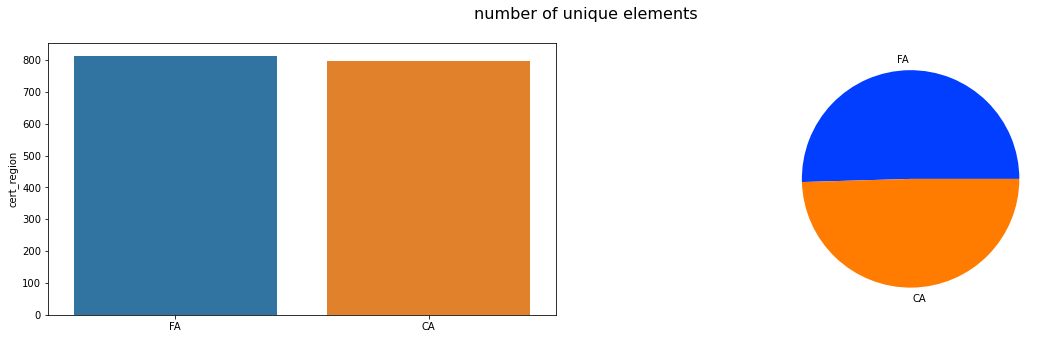

In [20]:
# subplt 
fig, axess = plt.subplots(nrows=1, ncols=2)
#axess.set(xlabel='common xlabel', ylabel='common ylabel')
fig.suptitle('number of unique elements ', fontsize=16)

palette_color = sns.color_palette('bright', 10)
sns.barplot(x=x0, y=y0, ax=axess[0])
axess[1].pie(y0,labels=x0,colors=palette_color,autopct='%1.1f%%')

fig, axess = plt.subplots(nrows=1, ncols=2)
fig.suptitle('number of unique elements ', fontsize=16)
sns.barplot(x=c, y=d, ax=axess[0])
axess[1].pie(d,labels=c,colors=palette_color)




3. Filter

For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [21]:
# filter datasets for rows following California standards
df_08 = fuel_data01.query('cert_region=="CA"')
df_18 = fuel_data02.query('cert_region=="CA"') 

In [22]:
df_08['cert_region'].unique() , df_18['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [23]:
df_08.drop(['cert_region'], axis=1, inplace=True)
df_08.head()

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2841335237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.drop(['cert_region'], axis=1, inplace=True)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [24]:
df_18.drop(['cert_region'], axis=1, inplace=True)
df_18.head()

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2599061982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop(['cert_region'], axis=1, inplace=True)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


4.Drop Nulls

Drop any rows in both datasets that contain missing values.

In [25]:
df_08.dropna(inplace=True) # here must have inplace=True
df_18.dropna(inplace=True)

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2853283180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.dropna(inplace=True) # here must have inplace=True
C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2853283180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.dropna(inplace=True)


In [26]:
df_08.isnull().sum().any()  , df_18.isnull().sum().any()

(False, False)

5. Dedupe Data

In [27]:
df_18.duplicated().sum()   ,   df_08.duplicated().sum()  

(3, 23)

In [28]:
df_08.drop_duplicates(inplace=True) # here must have inplace=True
df_18.drop_duplicates(inplace=True) 

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2753634778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.drop_duplicates(inplace=True) # here must have inplace=True
C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2753634778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop_duplicates(inplace=True)


In [29]:
df_08.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v2.csv', index=False)
df_18.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v2.csv', index=False)

In [30]:
df_08 = pd.read_csv(r"C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v2.csv")
df_18 = pd.read_csv(r"C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v2.csv")

6. Fixing Data Types

* Fix cyl datatype 2008: extract int from string. 2018: convert float to int.
* Fix air_pollution_score datatype 2008: convert string to float. 2018: convert int to float.
* Fix city_mpg, hwy_mpg, cmb_mpg datatypes 2008 and 2018: convert string to float.
*Fix greenhouse_gas_score datatype 2008: convert from float to int.

6.1 : Fixing cyl Data Type

2008: extract int from string

2018: convert float to int


In [31]:
df_08['cyl'].head(5), df_18['cyl'].head(5)


(0    (6 cyl)
 1    (4 cyl)
 2    (6 cyl)
 3    (6 cyl)
 4    (6 cyl)
 Name: cyl, dtype: object,
 0    6.0
 1    6.0
 2    4.0
 3    6.0
 4    6.0
 Name: cyl, dtype: float64)

In [32]:
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(np.int64)
#df_08['cyl'].value_counts()

In [33]:
df_08['cyl'].head(5)

0    6
1    4
2    6
3    6
4    6
Name: cyl, dtype: int64

In [34]:
# convert 2018 cyl column from float to int
df_18['cyl'] = df_18['cyl'].astype(int)
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [35]:
df_08.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v3.csv', index=False)
df_18.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v3.csv', index=False)

6.2 Fixing air_pollution_score Data Type

2008: convert string to float

2018: convert int to float

In [36]:
df_08 = pd.read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v3.csv')
df_18 = pd.read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v3.csv',)

In [37]:
df_18.iloc[52] 

model                               BMW 330e
displ                                    2.0
cyl                                        4
trans                             SemiAuto-8
drive                                    2WD
fuel                    Gasoline/Electricity
veh_class                          small car
air_pollution_score                        3
city_mpg                               28/66
hwy_mpg                                34/78
cmb_mpg                                30/71
greenhouse_gas_score                      10
smartway                                 Yes
Name: 52, dtype: object

It's not just the air pollution score! The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to this link, which I found from the PDF documentation:

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [38]:
# hybrids in 2018
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [39]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [40]:
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [41]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [42]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [43]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [44]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\3836134707.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)


In [45]:
new_rows


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [46]:
# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True) # drop original one 

# append new_rows to df_18  
df_18 = df_18.append(new_rows,ignore_index=True)

C:\Users\Amzad\AppData\Local\Temp\ipykernel_29528\2339575791.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18 = df_18.append(new_rows,ignore_index=True)


In [47]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

# NONE :) 

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [48]:
# convert int to float for 2018 air pollution column
df_08['air_pollution_score'] = df_18['air_pollution_score'].astype(float)
#df_08['air_pollution_score'].convert_objects(convert_numeric=True).dtypes
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)



In [49]:
df_08['air_pollution_score'].dtype, df_18['air_pollution_score'].dtype

(dtype('float64'), dtype('float64'))

In [50]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

6.3 Fix city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float

In [51]:
df_08 = read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_08_v4.csv')
df_18 = read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\data_18_v4.csv')
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                  int64
hwy_mpg                   int64
cmb_mpg                   int64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [53]:
# convert mpg columns to floats
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

6.4 Fix greenhouse_gas_score datatype

2008: convert from float to int

In [57]:
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)

In [59]:
df_08.dtypes , df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [60]:
# Save your final CLEAN datasets as new files!
df_08.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\clean_08.csv', index=False)
df_18.to_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\clean_18.csv', index=False)

# Exploring with Visuals

In [ ]:
#load clean_08
df_08 = pd.read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\clean_08.csv')
df_18 = pd.read_csv(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\clean_18.csv')


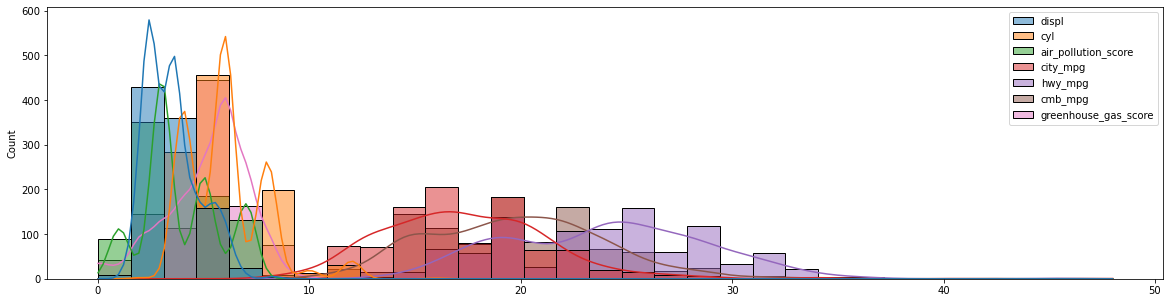

In [128]:
plt.rcParams["figure.figsize"] = (20,5)
sns.histplot(df_08, kde=True, color='red', label='2008')
#save the plot to folder fig
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\all_clen_hist_08.png')

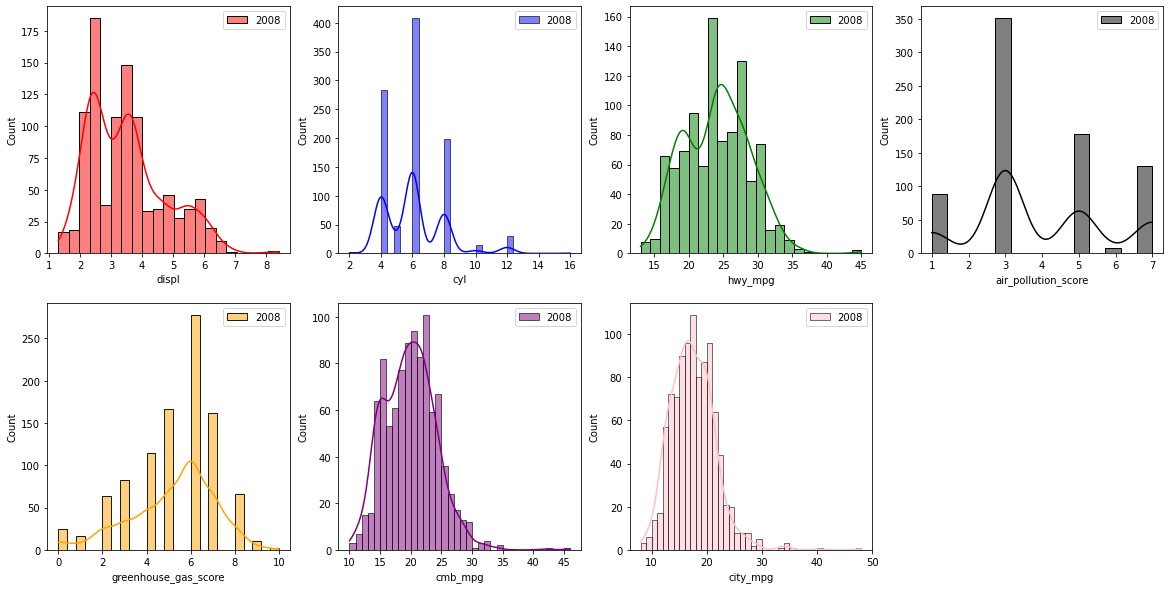

In [125]:
#sns.histplot([df_08['cyl'],df_08['hwy_mpg'],df_08['air_pollution_score']], kde=True, color='red', label='2008')
list_of_col=['displ','cyl','hwy_mpg','air_pollution_score','greenhouse_gas_score','cmb_mpg','city_mpg']
plot_color=['red','blue','green','black','orange','purple','pink','yellow']
plt.rcParams["figure.figsize"] = (20,10)
#sns.histplot(df_08, kde=True, color='red', label='2008')


count=0
#subplot df_08  and df_18
for i in list_of_col:
    plt.subplot(2,4,count+1)
    sns.histplot(df_08[i], kde=True, color=plot_color[count], label='2008')
    #sns.histplot(df_18[i], kde=True, color=plot_color[(count+1)], label='2018')
    plt.legend()
    count+=1

#save the plot of fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\histplot_08.png')


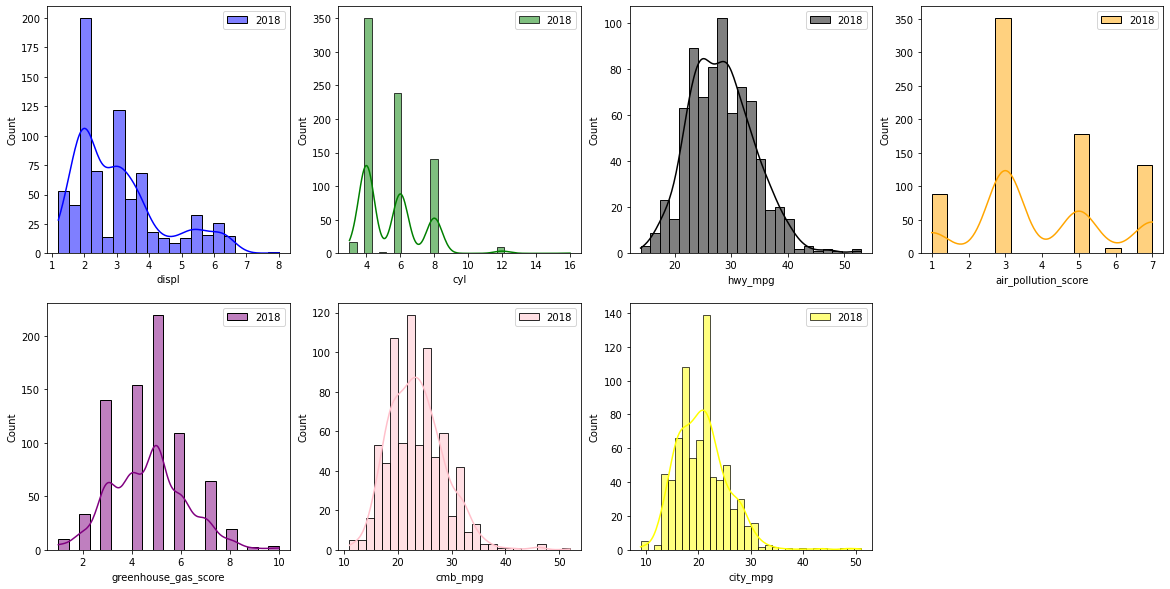

In [126]:
count=0
#subplot df_08  and df_18
for i in list_of_col:
    plt.subplot(2,4,count+1)
    #sns.histplot(df_08[i], kde=True, color=plot_color[count], label='2008')
    sns.histplot(df_18[i], kde=True, color=plot_color[(count+1)], label='2018')
    plt.legend()
    count+=1

#save the plot of fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\histplot_18.png')

* Throught the plot, we can see from 2008 to 2018, combined_mpg becomes more screwed to the right .
* Throught the plot, we can see from 2008 to 2018, the distributions of greenhouse gas score turns to be more screwed to left .

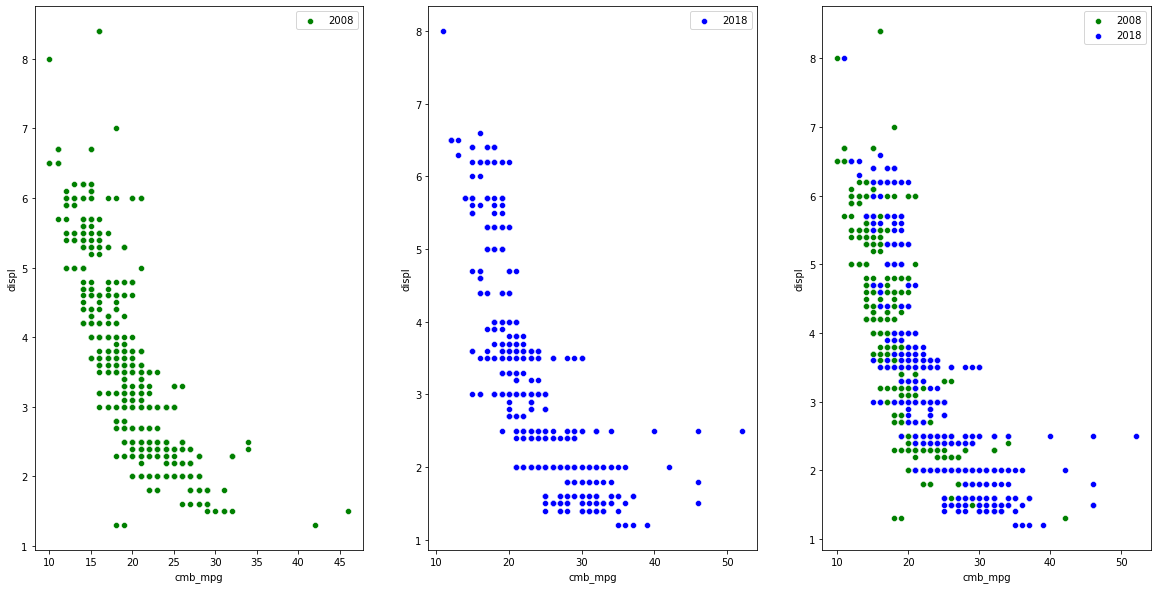

In [166]:
fig, axess = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = (20,10)
sns.scatterplot(data = df_08, x = 'cmb_mpg', y = 'displ',color='green',label='2008',ax=axess[0])
#axess[0].title('The relationship Engine Size and Combined_mpg in 2008')
sns.scatterplot(data = df_18, x = 'cmb_mpg', y = 'displ',color='blue',label='2018',ax=axess[1])
#plt.title('The relationship Engine Size and Combined_mpg in 2018')
sns.scatterplot(data = df_08, x = 'cmb_mpg', y = 'displ',color='green',label='2008',ax=axess[2])
sns.scatterplot(data = df_18, x = 'cmb_mpg', y = 'displ',color='blue',label='2018',ax=axess[2])

#save the plot of fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\cmbvsdipl_scatter_08.png')

No matter for year 2008 dataset or 2018 dataset, there is a very obvious negative coorelation between displacement and combined mpg.

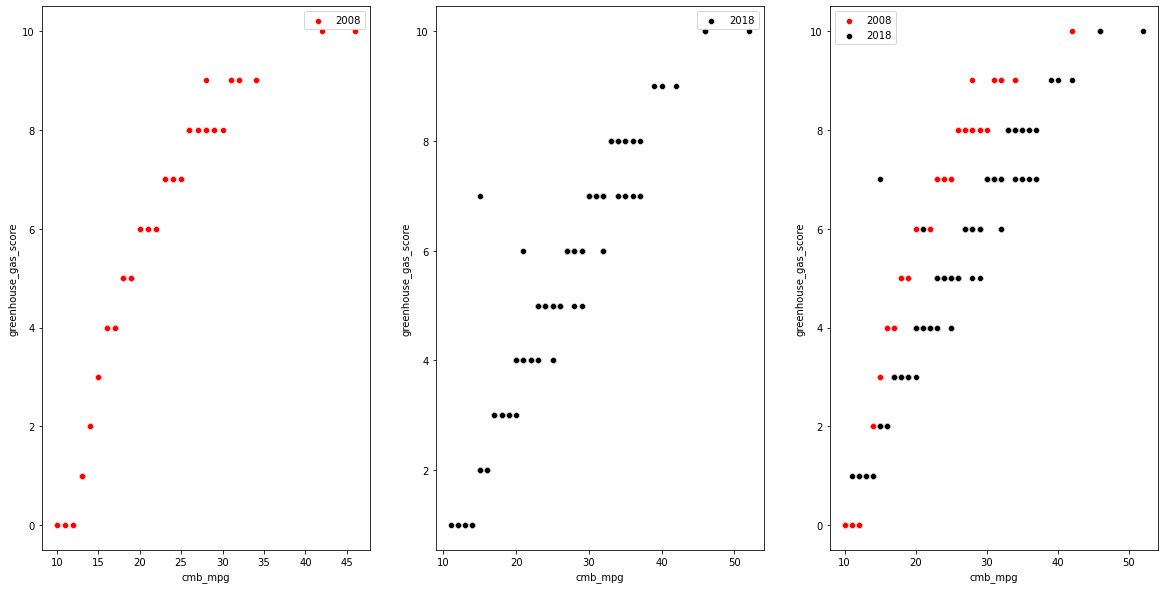

In [174]:
fig, axess = plt.subplots(nrows=1, ncols=3)
sns.scatterplot(data = df_08 , x='cmb_mpg' , y = 'greenhouse_gas_score',color='red',label='2008',ax=axess[0])
sns.scatterplot(data = df_18 , x='cmb_mpg' , y = 'greenhouse_gas_score',color='black',label='2018',ax=axess[1])
sns.scatterplot(data = df_08 , x='cmb_mpg' , y = 'greenhouse_gas_score',color='red',label='2008',ax=axess[2])
sns.scatterplot(data = df_18 , x='cmb_mpg' , y = 'greenhouse_gas_score',color='black',label='2018',ax=axess[2])
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\cmbvgsc_scatter_08.png')


No matter for year 2008 dataset or 2018 dataset, there is a very strong positive correlation between greenhouse gas score and combined mpg.

# Conclusions & Visuals:
### The following are the 5 questions we raised at the beginning. Let's find the answers.

* Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
* Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
* Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
* Q4: What features are associated with better fuel economy (mpg)?
* Q5:For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [172]:
# q1: what are the alternative sources?  CNG and Ethanol and Electricity are all altenative sources
 # CNG and Ethanol
# q1: what are the alternative sources?  CNG and Ethanol and Electricity are all altenative sources
df_08['fuel'].value_counts() ,df_18['fuel'].value_counts()  # CNG and Ethanol

(Gasoline    984
 CNG           1
 Name: fuel, dtype: int64,
 Gasoline    737
 Diesel       19
 ethanol       1
 gas           1
 Name: fuel, dtype: int64)

<AxesSubplot:ylabel='fuel'>

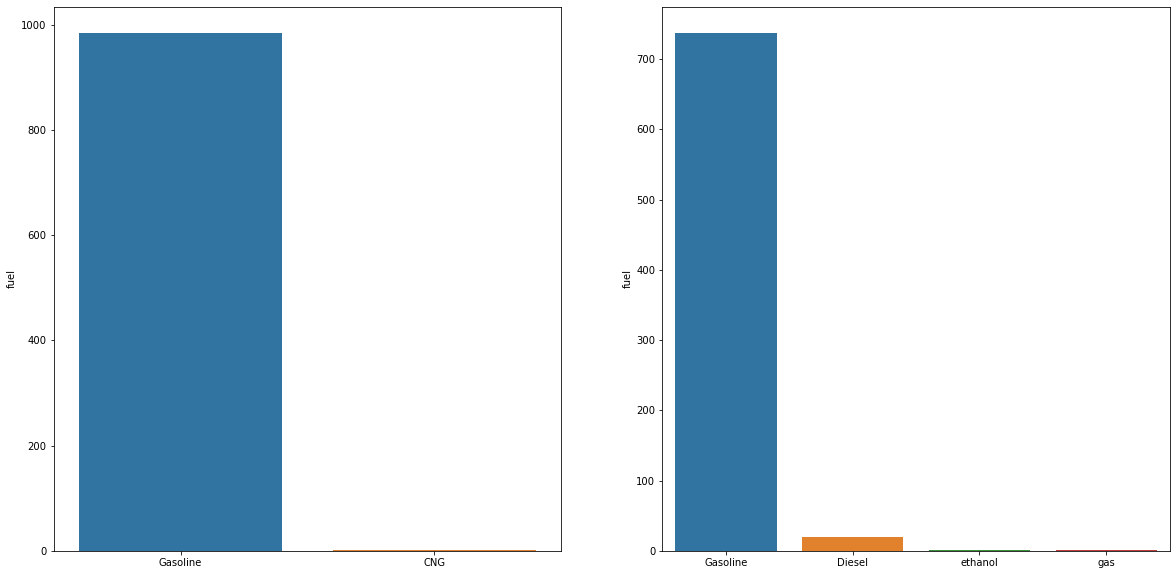

In [212]:
#fig, axess = plt.subplot(nrows=1,ncols=2)
fig, axess = plt.subplots(nrows=1, ncols=2)

plt.rcParams["figure.figsize"] = (20,30)
sns.barplot(x=df_08['fuel'].unique(),y=df_08['fuel'].value_counts(),ax=axess[0])
sns.barplot(x=df_18['fuel'].unique(),y=df_18['fuel'].value_counts(),ax=axess[1])


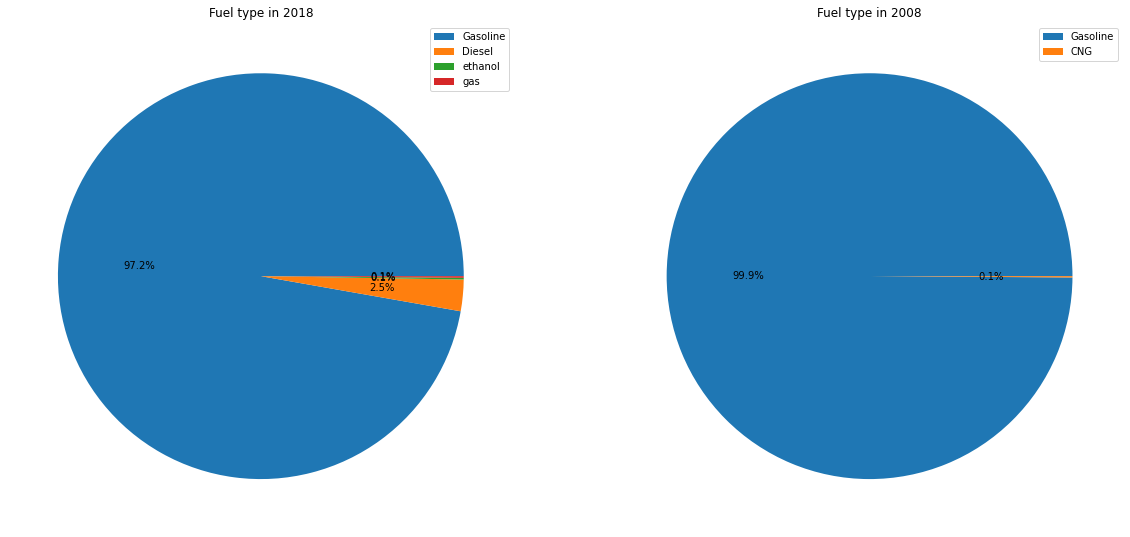

In [236]:
#chang figure size
#subplot df_08  and df_18
fig,axs=plt.subplots(nrows=1,ncols=2)
plt.rcParams["figure.figsize"] = (20,10)
axs[0].pie(df_18['fuel'].value_counts(),autopct='%1.1f%%')
axs[0].legend(df_18['fuel'].unique())
axs[0].set_title('Fuel type in 2018')
axs[1].pie(df_08['fuel'].value_counts(),autopct='%1.1f%%')
axs[1].legend(df_08['fuel'].unique())
axs[1].set_title('Fuel type in 2008')
#save the plot of fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\pie_fuel_08and18.png')


in this plot we can find out that the nuber of alternative fuel use is increasing but the progress is very very slow 

In [221]:
al_08 = df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
al_18 = df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique()

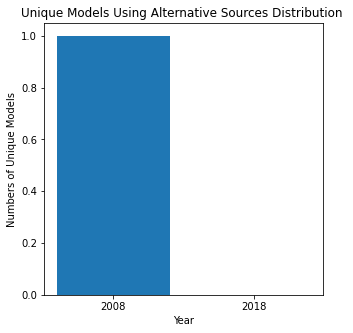

In [223]:
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(['2008','2018'],[al_08 , al_18] )

plt.title('Unique Models Using Alternative Sources Distribution ')
plt.xlabel('Year')
plt.ylabel('Numbers of Unique Models');

Q2: How much have vehicle classes improved in fuel economy?

Let's look at the average fuel economy for each vehicle class for both years.

In [245]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()


In [247]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08


b:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


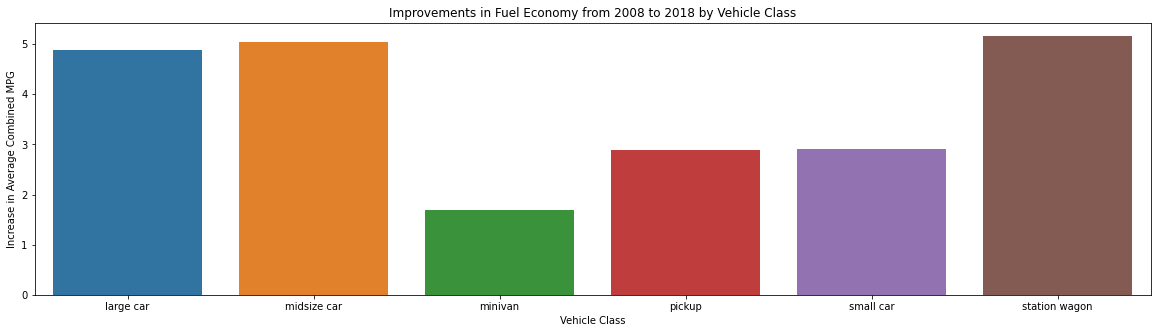

In [248]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(20, 5))
sns.barplot(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')
#save the plot of fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\project\data_view\project_name\data\fig\q2inc.png')

Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?
